In [1]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import sys
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.abspath('../src'))
from diffusion import Reaction_Diffusion
from reaction_list_creator import *
from some_functions import *
from model_linear import *

In [2]:
diffusion_pred = pd.read_pickle('../files/processed_data/diffusion_pred.pkl')
capacity_pred = pd.read_pickle('../files/processed_data/capacity_pred.pkl')

L = 20 #nm
n = L/3
diffusion_pred['flux'] = diffusion_pred['D'] / (L * 1e-9)
diffusion_dict = diffusion_pred.set_index('n')['flux'].to_dict()

crII = joblib.load('../files/processed_data/CrII_energies.pkl')
ni = joblib.load('../files/processed_data/Ni_energies.pkl')
crIII = joblib.load('../files/processed_data/CrIII_energies.pkl')
capacity = pd.read_pickle('../files/processed_data/capacity_pred.pkl').query(f'temperature == 300 and p == 100000').set_index('alken')['capacity'].to_dict()
distribution = pd.read_pickle('../files/processed_data/distribution_df.pkl').query('temperature == 300 and p == 100000')
distr = distribution.set_index('alken')['ratio'].to_dict()

   0.521 conversion


Text(0, 0.5, 'Selectivity (%)')

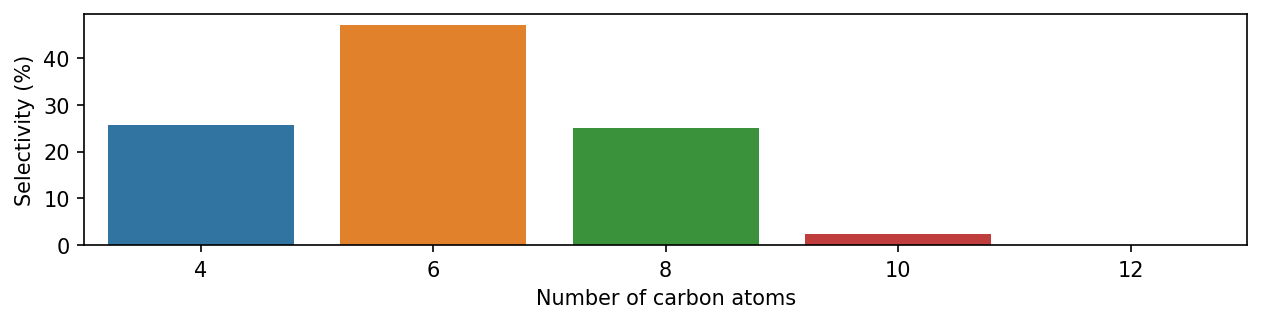

In [3]:
x = [6.00000000e+08, 5.99995714e+01, 1.16496197e-05]
result = run_model(12, x, ni, capacity=capacity, diffusion_dict=diffusion_dict)
df = calc_distribution(result)
print('{:8.3f} conversion'.format(1 - df.query('n==2').sum().values[0]/0.4))

fig, ax = plt.subplots(1, 1, figsize=(10, 2), dpi=150)
df = df.query('n>2').reset_index()
df['selectivity'] = (df['concentration'] / df['concentration'].sum()) * 100
sns.barplot(x='n', y='selectivity', data=df.reset_index(), ax=ax)
ax.set_xlabel('Number of carbon atoms')
ax.set_ylabel('Selectivity (%)')

   0.487 conversion
   0.981 conversion
   0.983 conversion
   0.984 conversion
   0.984 conversion
   0.985 conversion
   0.986 conversion
   0.986 conversion
   0.988 conversion
   0.989 conversion
   0.989 conversion
   0.989 conversion
   0.989 conversion
   0.990 conversion
   0.990 conversion
   0.990 conversion
   0.990 conversion
   0.988 conversion
   0.988 conversion
   0.988 conversion
   0.986 conversion
   0.986 conversion
   0.985 conversion
   0.983 conversion
   0.981 conversion
   0.981 conversion
   0.981 conversion
   0.981 conversion
   0.747 conversion
   0.595 conversion
   0.539 conversion
   0.518 conversion
   0.493 conversion
   0.448 conversion
   0.444 conversion
   0.439 conversion
   0.425 conversion
   0.420 conversion
   0.420 conversion
   0.481 conversion
   0.586 conversion
   0.747 conversion
   0.804 conversion
   0.804 conversion
   0.804 conversion
   0.804 conversion
   0.804 conversion
   0.804 conversion
   0.804 conversion
   0.826 conversion


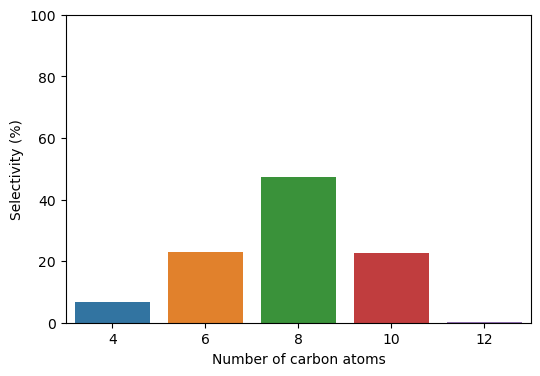

In [3]:
# Function to update the plot based on slider value for 'a'
def update_plot(a_val, b_val):
    # Clear the previous plot
    ax.clear()
    
    # Generate new x and y data based on a
    x = [a_val, b_val, 1.16496197e-05]
    result = run_model(12, x, ni, capacity=capacity, diffusion_dict=diffusion_dict, n_steps=5000)
    df = calc_distribution(result)
    print('{:8.3f} conversion'.format(1 - df.query('n==2').sum().values[0]/0.4))

    df = df.query('n>2').reset_index()
    df['selectivity'] = (df['concentration'] / df['concentration'].sum()) * 100
    sns.barplot(x='n', y='selectivity', data=df.reset_index(), ax=ax)
    ax.set_xlabel('Number of carbon atoms')
    ax.set_ylabel('Selectivity (%)')
    # ax.set_xlim(-20, 20)
    ax.set_ylim(0, 100)
    canvas.draw()

# Function to handle slider value change
def on_slider_change(event=None):
    a_val = a_slider.get()  # Get the current value of the 'a' slider
    b_val = b_slider.get()  # Get the current value of the 'b' slider
    update_plot(a_val, b_val)

# Set up the Tkinter window
root = tk.Tk()
root.title("Interactive Plot of y = a * x^2")

# Set up the plot figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a canvas to display the plot in the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

# Create a slider to adjust the value of 'a'
a_slider_label = ttk.Label(root, text="Select value for a:")
a_slider_label.pack(pady=10)

a_slider = ttk.Scale(root, from_=5e7, to=1e9, orient='horizontal', command=on_slider_change)
a_slider.pack(pady=10)

# Create a second slider to adjust the value of 'b'
b_slider_label = ttk.Label(root, text="Select value for b:")
b_slider_label.pack(pady=10)

b_slider = ttk.Scale(root, from_=1e+01, to=1e2, orient='horizontal', command=on_slider_change)
b_slider.pack(pady=10)


# Initial plot with default a value (1)
update_plot(6.00000000e+08, 5.99995714e+01)

# Start the Tkinter event loop
root.mainloop()